Ejemplo 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
df = pd.read_csv('../content/drive/MyDrive/Code/BEDU/All_Datasets/Remoto_Datasets/Remoto athlete_olympic_events-clean.csv', index_col=0)
df.head(3)

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


<ipython-input-2-721b7c802040>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['age'], kde=False, norm_hist=False)


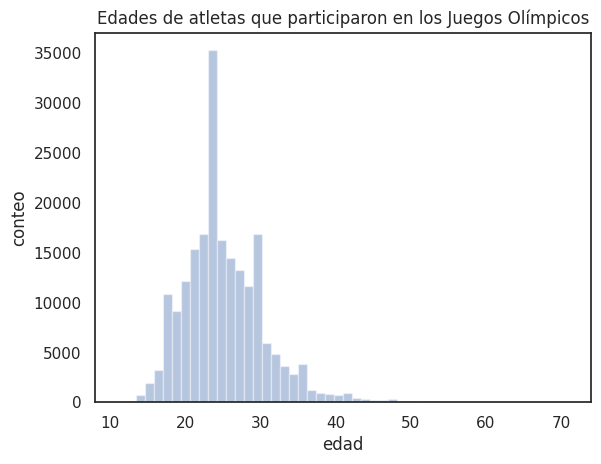

In [ ]:
ax = sns.distplot(df['age'], kde=False, norm_hist=False)
ax.set(title='Edades de atletas que participaron en los Juegos Olímpicos', xlabel='edad', ylabel='conteo');

In [ ]:
by_athlete = df.groupby(level=0)[['age', 'height', 'weight']].mean()
sex = df.groupby(level=0)['sex'].last()
merged = by_athlete.merge(sex, left_index=True, right_index=True)
males = by_athlete[merged['sex'] == 'M']
females = by_athlete[merged['sex'] == 'F']

<ipython-input-4-0e0746ee7923>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(males['height'], hist=False, kde_kws = {'shade': True}, label='hombres')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-4-0e0746ee7923>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level functio

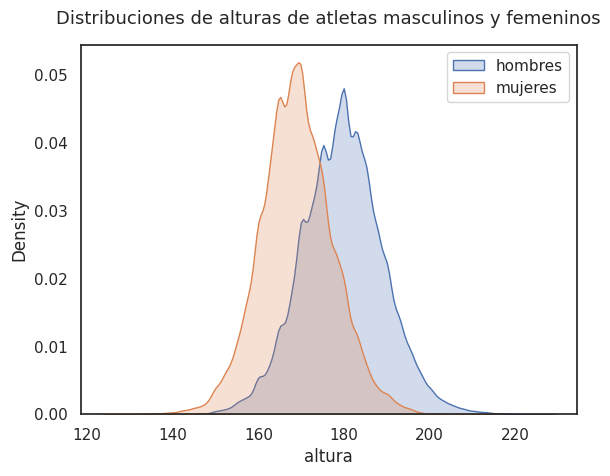

In [ ]:
ax = sns.distplot(males['height'], hist=False, kde_kws = {'shade': True}, label='hombres')
sns.distplot(females['height'], hist=False, kde_kws = {'shade': True}, ax=ax, label='mujeres')
ax.set_title('Distribuciones de alturas de atletas masculinos y femeninos', fontsize=13, pad=15);
ax.set(xlabel='altura');
ax.legend(loc='upper right');

<ipython-input-5-e065f47d2a9d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['age'], kde=False, norm_hist=False)


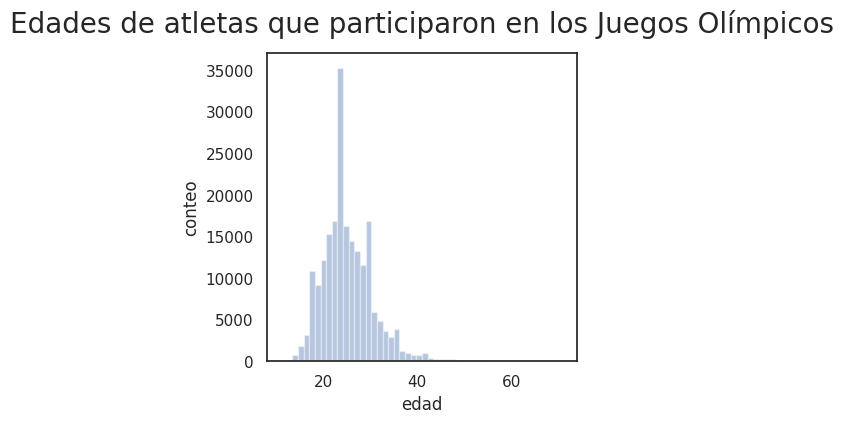

In [ ]:
fig = plt.figure(figsize=(4, 4))
ax = sns.distplot(df['age'], kde=False, norm_hist=False)
ax.set_title('Edades de atletas que participaron en los Juegos Olímpicos', fontsize=20, pad=15)
ax.set(xlabel='edad', ylabel='conteo');

Ejemplo 2 Tree

In [ ]:
#Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sns.set(style='white')
df = pd.read_json('../content/drive/MyDrive/Code/BEDU/All_Datasets/Remoto_Datasets/Remoto zomato_reviews-clean.json')
df.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


In [ ]:
df['user_rating'].unique()

array(['Very Good', 'Excellent', 'Poor', 'Good', 'Average', 'Not rated'],
      dtype=object)

In [ ]:
df['user_rating'].nunique()

6

In [ ]:
df['user_rating'].value_counts()

Very Good    490
Good         346
Excellent    194
Average      119
Not rated     26
Poor           5
Name: user_rating, dtype: int64

In [ ]:
counts = df['user_rating'].value_counts()

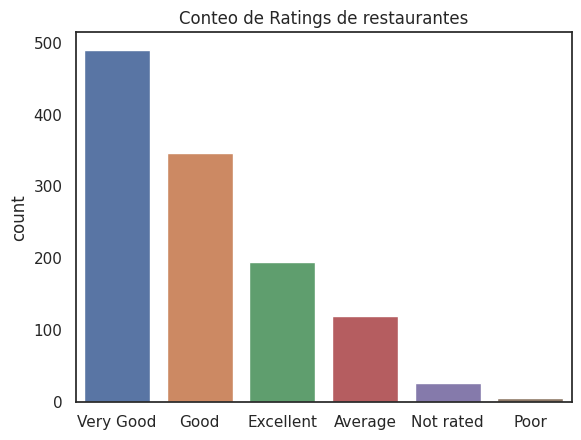

In [ ]:
ax = sns.barplot(x = counts.index, y = counts)
ax.set_title('Conteo de Ratings de restaurantes')
ax.set(ylabel='count');

In [ ]:
counts * 100 / counts.sum()

Very Good    41.525424
Good         29.322034
Excellent    16.440678
Average      10.084746
Not rated     2.203390
Poor          0.423729
Name: user_rating, dtype: float64

In [ ]:
as_percentages = counts * 100 / counts.sum()

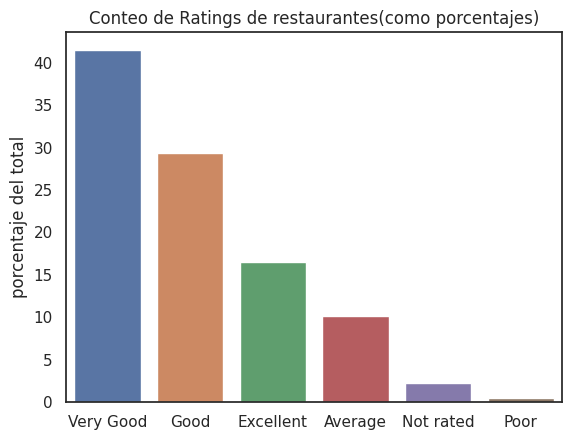

In [ ]:
ax = sns.barplot(x = as_percentages.index, y = as_percentages)
ax.set_title('Conteo de Ratings de restaurantes(como porcentajes)')
ax.set(ylabel='porcentaje del total');

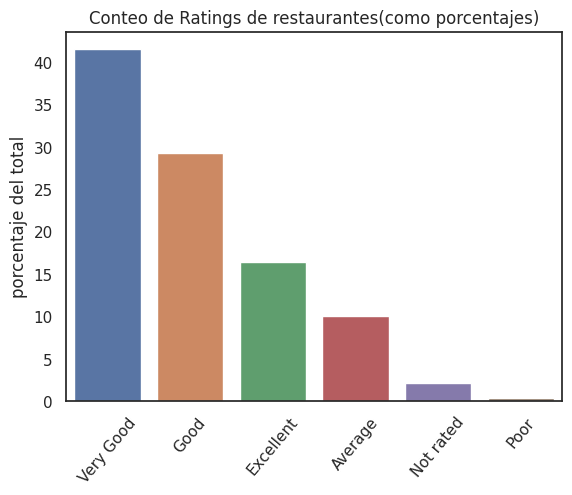

In [ ]:
ax = sns.barplot(x = as_percentages.index, y = as_percentages)
ax.set_title('Conteo de Ratings de restaurantes(como porcentajes)')
ax.set(ylabel='porcentaje del total')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

[Text(0, 0.5, 'porcentaje del total')]

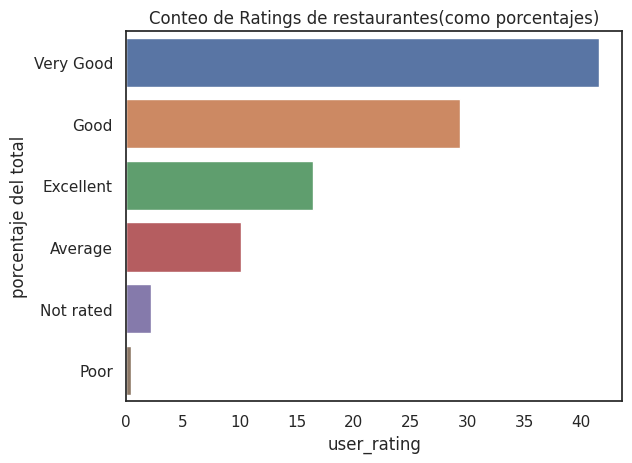

In [ ]:
ax = sns.barplot(y = as_percentages.index, x = as_percentages)
ax.set_title('Conteo de Ratings de restaurantes(como porcentajes)')
ax.set(ylabel='porcentaje del total')

In [ ]:
df['user_rating'].mode()

0    Very Good
Name: user_rating, dtype: object

Reto 2

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
import warnings
warnings.filterwarnings("ignore")

sns.set(style='white')
df = pd.read_csv('../content/drive/MyDrive/Code/BEDU/All_Datasets/Remoto_Datasets/Remoto melbourne_housing-clean.csv')
df.head()

,Unnamed: 0,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
df['rooms'].unique()

array([2, 3, 4, 1, 6, 5, 8, 7])

In [ ]:
df['rooms'].nunique()

8

In [ ]:
df['rooms'].value_counts()

3    4916
2    3389
4    2146
1     645
5     479
6      55
7       9
8       7
Name: rooms, dtype: int64

In [ ]:
rooms_counts = df['rooms'].value_counts()

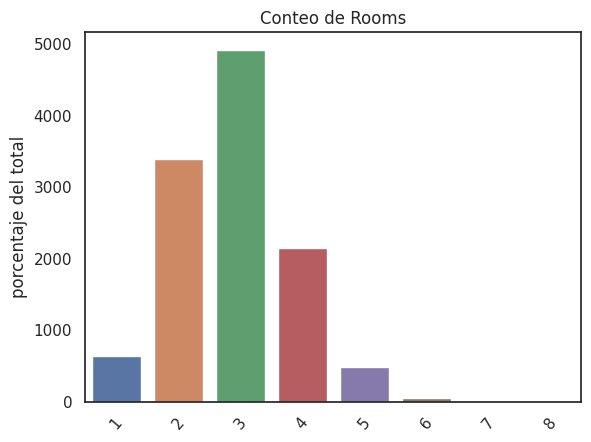

In [ ]:
ax = sns.barplot(x = rooms_counts.index, y = rooms_counts)
ax.set_title('Conteo de Rooms')
ax.set(ylabel='porcentaje del total')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

<Axes: ylabel='rooms'>

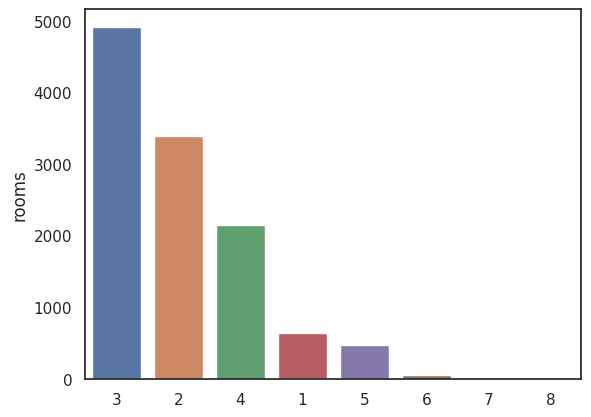

In [ ]:
rooms = df["rooms"].value_counts()
sns.barplot(x = rooms.index, y = rooms, order = rooms.index)

In [ ]:
df['type'].unique()

array(['h', 'u', 't'], dtype=object)

In [ ]:
df['type'].nunique()

3

In [ ]:
df['type'].value_counts()

h    7762
u    2859
t    1025
Name: type, dtype: int64

In [ ]:
types_counts = df['type'].value_counts()

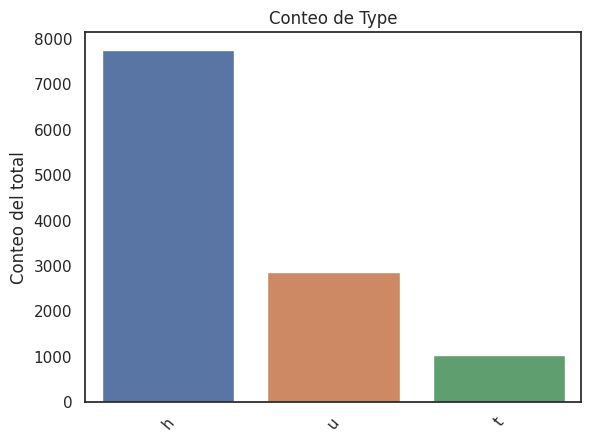

In [ ]:
ax = sns.barplot(x = types_counts.index, y = types_counts)
ax.set_title('Conteo de Type')
ax.set(ylabel='Conteo del total')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

In [ ]:
df["council_area"].unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', 'Knox', 'Maroondah',
       'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik', 'Whittlesea',
       'Frankston', 'Macedon Ranges', 'Yarra Ranges', 'Wyndham',
       'Cardinia', 'Moorabool', 'Mitchell'], dtype=object)

In [ ]:
df["council_area"].nunique()

33

In [ ]:
df["council_area"].value_counts()

Moreland             1129
Boroondara           1128
Moonee Valley         961
Darebin               895
Glen Eira             831
Stonnington           710
Maribyrnong           675
Yarra                 644
Port Phillip          622
Banyule               557
Bayside               473
Melbourne             463
Hobsons Bay           418
Brimbank              392
Monash                313
Manningham            300
Whitehorse            290
Kingston              177
Hume                  128
Whittlesea            122
Wyndham                68
Knox                   65
Maroondah              62
Melton                 49
Greater Dandenong      47
Frankston              39
Casey                  31
Nillumbik              26
Yarra Ranges           16
Macedon Ranges          6
Cardinia                6
Moorabool               2
Mitchell                1
Name: council_area, dtype: int64

In [ ]:
council_area_counts = df["council_area"].value_counts()

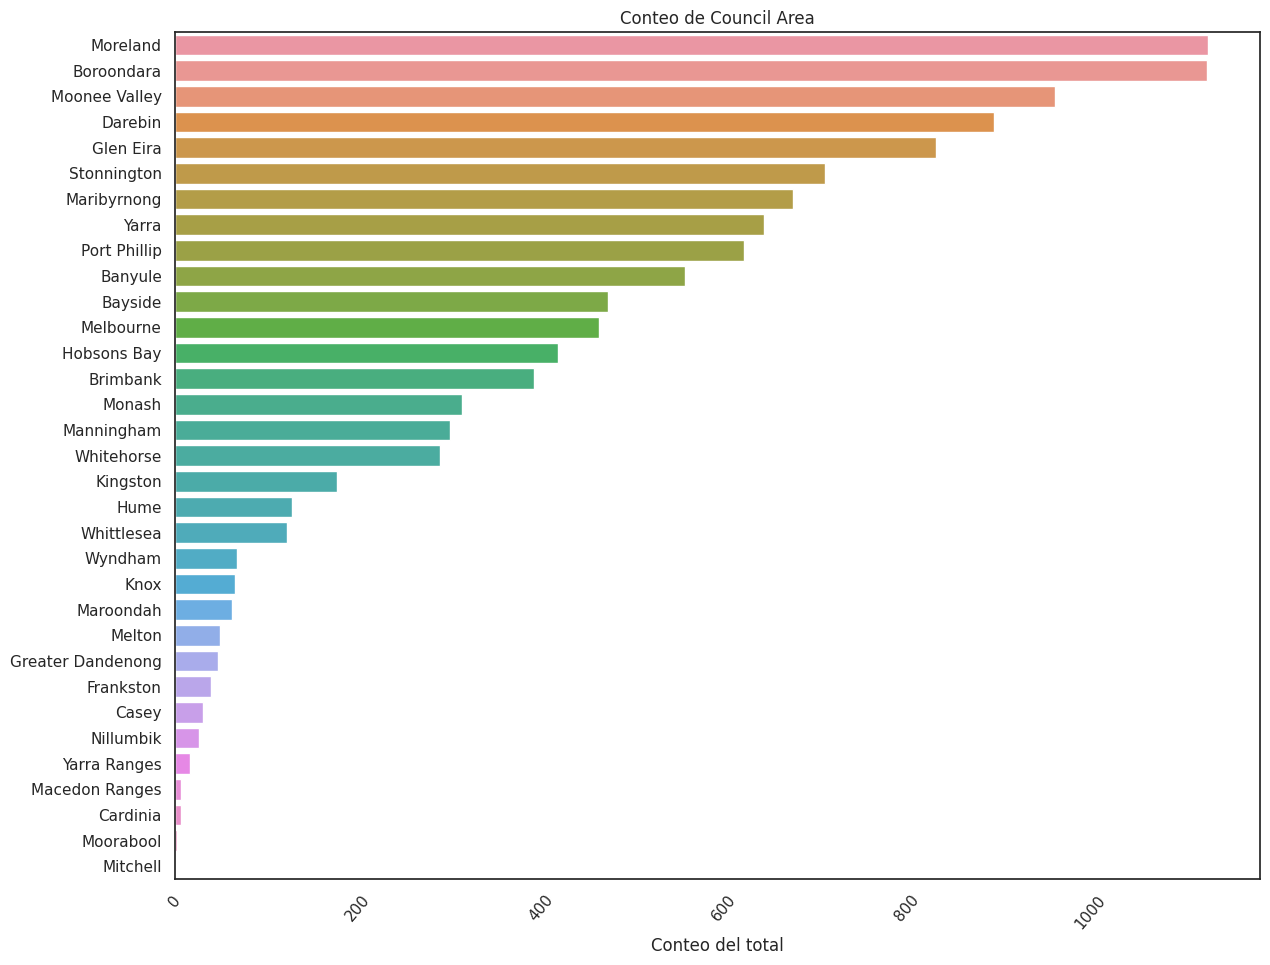

In [ ]:
fig = plt.figure(figsize=(14, 11))
ax = sns.barplot(y = council_area_counts.index, x = council_area_counts)
ax.set_title('Conteo de Council Area')
ax.set(xlabel='Conteo del total')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

Ejemplo 3

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
import warnings
warnings.filterwarnings("ignore")

sns.set(style='white')
df = pd.read_json('../content/drive/MyDrive/Code/BEDU/All_Datasets/Remoto_Datasets/Remoto zomato_reviews-clean.json')
df.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


In [ ]:
df.groupby(["price_range", "user_rating"]).size()

price_range  user_rating
1            Average         12
             Excellent        9
             Good            33
             Not rated        1
             Very Good       19
2            Average         47
             Excellent       37
             Good           116
             Not rated        3
             Poor             2
             Very Good      132
3            Average         41
             Excellent       84
             Good           141
             Not rated        3
             Poor             1
             Very Good      218
4            Average         19
             Excellent       64
             Good            56
             Not rated       19
             Poor             2
             Very Good      121
dtype: int64

In [ ]:
pd.crosstab(df['price_range'], df['user_rating'])

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good
price_range,,,,,,
1,12,9,33,1,0,19
2,47,37,116,3,2,132
3,41,84,141,3,1,218
4,19,64,56,19,2,121


In [ ]:
pd.crosstab(df['price_range'], df['user_rating'], margins=True, margins_name='Total')

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good,Total
price_range,,,,,,,
1,12,9,33,1,0,19,74
2,47,37,116,3,2,132,337
3,41,84,141,3,1,218,488
4,19,64,56,19,2,121,281
Total,119,194,346,26,5,490,1180


In [ ]:
pd.crosstab(df['price_range'], df['user_rating'], margins=True, margins_name='Total').T
# .T significa Transpuesta

price_range,1,2,3,4,Total
user_rating,,,,,
Average,12,47,41,19,119
Excellent,9,37,84,64,194
Good,33,116,141,56,346
Not rated,1,3,3,19,26
Poor,0,2,1,2,5
Very Good,19,132,218,121,490
Total,74,337,488,281,1180


In [ ]:
pd.crosstab(df['price_range'], [df['has_online_delivery'], df['user_rating']], margins=True, margins_name='Total')

has_online_delivery       0                                               1  \
user_rating         Average Excellent Good Not rated Poor Very Good Average   
price_range                                                                   
1                        12         8   32         1    0        15       0   
2                        47        30  104         3    1        99       0   
3                        40        70  132         3    1       183       1   
4                        19        61   52        19    2       113       0   
Total                   118       169  320        26    4       410       1   

has_online_delivery                               Total  
user_rating         Excellent Good Poor Very Good        
price_range                                              
1                           1    1    0         4    74  
2                           7   12    1        33   337  
3                          14    9    0        35   488  
4                           3    4    0         8   281  
Total                      25   26    1        80  1180

In [ ]:
pd.crosstab(df['price_range'], [df['has_online_delivery'], df['user_rating']], margins=True, margins_name='total').T

price_range                       1    2    3    4  total
has_online_delivery user_rating                          
0                   Average      12   47   40   19    118
                    Excellent     8   30   70   61    169
                    Good         32  104  132   52    320
                    Not rated     1    3    3   19     26
                    Poor          0    1    1    2      4
                    Very Good    15   99  183  113    410
1                   Average       0    0    1    0      1
                    Excellent     1    7   14    3     25
                    Good          1   12    9    4     26
                    Poor          0    1    0    0      1
                    Very Good     4   33   35    8     80
total                            74  337  488  281   1180

In [ ]:
crosstab = pd.crosstab(df['price_range'], [df['has_online_delivery'], df['user_rating']])
crosstab

has_online_delivery       0                                               1  \
user_rating         Average Excellent Good Not rated Poor Very Good Average   
price_range                                                                   
1                        12         8   32         1    0        15       0   
2                        47        30  104         3    1        99       0   
3                        40        70  132         3    1       183       1   
4                        19        61   52        19    2       113       0   

has_online_delivery                                
user_rating         Excellent Good Poor Very Good  
price_range                                        
1                           1    1    0         4  
2                           7   12    1        33  
3                          14    9    0        35  
4                           3    4    0         8

In [ ]:
crosstab.loc[:, (0)]

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good
price_range,,,,,,
1,12,8,32,1,0,15
2,47,30,104,3,1,99
3,40,70,132,3,1,183
4,19,61,52,19,2,113


In [ ]:
crosstab.loc[:, (1, 'Poor')]

price_range
1    0
2    1
3    0
4    0
Name: (1, Poor), dtype: int64

In [ ]:
crosstab.iloc[:, 9]
# El iloc se usa para posiciones corridas desde el 0

price_range
1    0
2    1
3    0
4    0
Name: (1, Poor), dtype: int64

In [ ]:
crosstab.stack(level=0)
# .stack() convierte una tabla de contingencia en una Serie de Pandas en lugar de un DataFrame = Descompone un df en una estructura de datos más larga y estrecha.

user_rating                      Average  Excellent  Good  Not rated  Poor  \
price_range has_online_delivery                                              
1           0                         12          8    32        1.0     0   
            1                          0          1     1        NaN     0   
2           0                         47         30   104        3.0     1   
            1                          0          7    12        NaN     1   
3           0                         40         70   132        3.0     1   
            1                          1         14     9        NaN     0   
4           0                         19         61    52       19.0     2   
            1                          0          3     4        NaN     0   

user_rating                      Very Good  
price_range has_online_delivery             
1           0                           15  
            1                            4  
2           0                           99  
            1                           33  
3           0                          183  
            1                           35  
4           0                          113  
            1                            8

In [ ]:
crosstab.stack(level=0).unstack(level = 0)

user_rating         Average             Excellent             Good       ...  \
price_range               1   2   3   4         1   2   3   4    1    2  ...   
has_online_delivery                                                      ...   
0                        12  47  40  19         8  30  70  61   32  104  ...   
1                         0   0   1   0         1   7  14   3    1   12  ...   

user_rating         Not rated       Poor          Very Good                
price_range                 3     4    1  2  3  4         1   2    3    4  
has_online_delivery                                                        
0                         3.0  19.0    0  1  1  2        15  99  183  113  
1                         NaN   NaN    0  1  0  0         4  33   35    8  

[2 rows x 24 columns]

In [ ]:
stack_level_0 = crosstab.stack(level=0)
stack_level_0.loc[(2)]
# Se selecciona la fila 2 en ambos

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good
has_online_delivery,,,,,,
0,47,30,104,3.0,1,99
1,0,7,12,NaN,1,33


In [ ]:
stack_level_0.loc[(2, 1)]

user_rating
Average       0.0
Excellent     7.0
Good         12.0
Not rated     NaN
Poor          1.0
Very Good    33.0
Name: (2, 1), dtype: float64

In [ ]:
crosstab.stack(level=1)
# (level=1) ahora es 1 para apliar columnas, en lugar de (level=0) de apilar filas

has_online_delivery        0     1
price_range user_rating           
1           Average       12   0.0
            Excellent      8   1.0
            Good          32   1.0
            Not rated      1   NaN
            Poor           0   0.0
            Very Good     15   4.0
2           Average       47   0.0
            Excellent     30   7.0
            Good         104  12.0
            Not rated      3   NaN
            Poor           1   1.0
            Very Good     99  33.0
3           Average       40   1.0
            Excellent     70  14.0
            Good         132   9.0
            Not rated      3   NaN
            Poor           1   0.0
            Very Good    183  35.0
4           Average       19   0.0
            Excellent     61   3.0
            Good          52   4.0
            Not rated     19   NaN
            Poor           2   0.0
            Very Good    113   8.0

Reto 3

Ejemplo 4

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

df = pd.read_json('../content/drive/MyDrive/Code/BEDU/All_Datasets/Remoto_Datasets/Remoto zomato_reviews-clean.json')
df.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


In [ ]:
crosstab = pd.crosstab(df['price_range'], df['user_rating'])
crosstab

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good
price_range,,,,,,
1,12,9,33,1,0,19
2,47,37,116,3,2,132
3,41,84,141,3,1,218
4,19,64,56,19,2,121


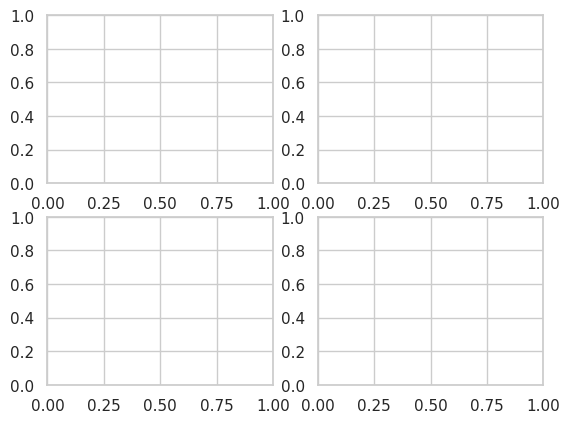

In [ ]:
fig, axes = plt.subplots(2, 2)

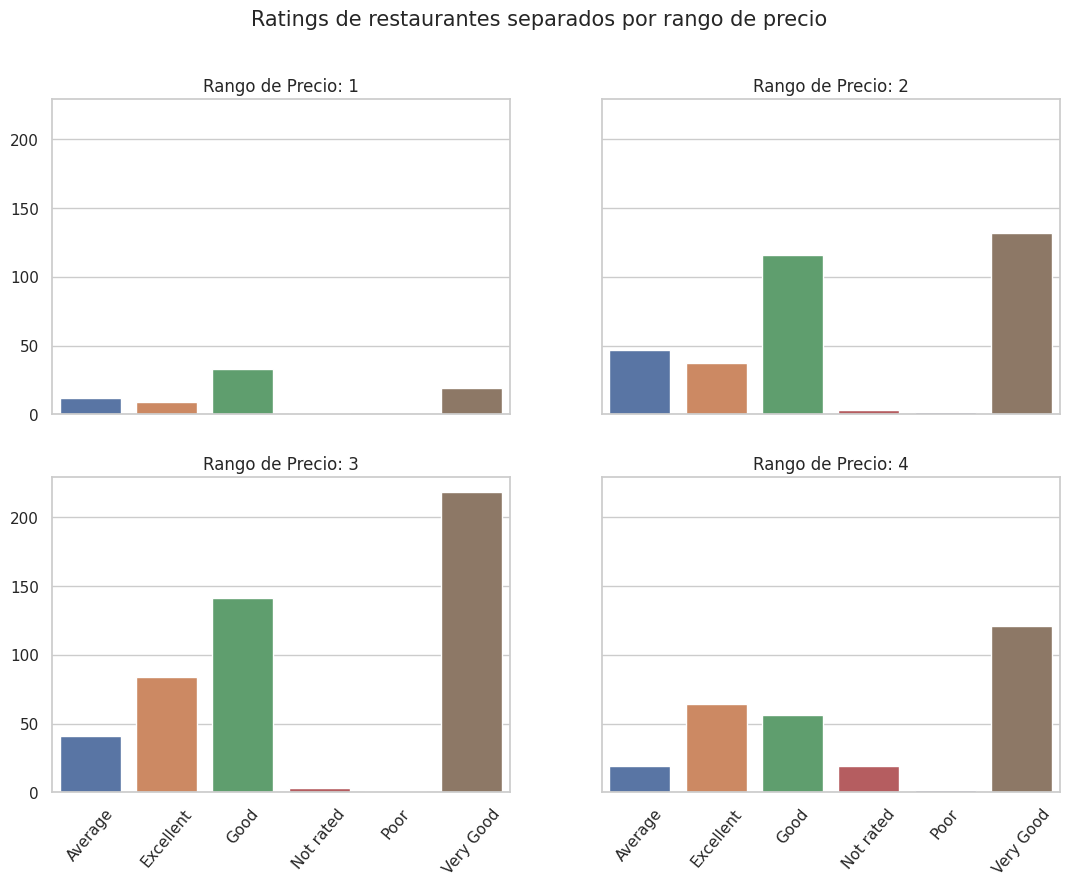

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(13, 9), sharex=True, sharey=True)

sns.barplot(x=crosstab.columns, y=crosstab.loc[1], ax=axes[0, 0])
sns.barplot(x=crosstab.columns, y=crosstab.loc[2], ax=axes[0, 1])
sns.barplot(x=crosstab.columns, y=crosstab.loc[3], ax=axes[1, 0])
sns.barplot(x=crosstab.columns, y=crosstab.loc[4], ax=axes[1, 1])

axes[0, 0].set(xlabel='', ylabel='', title='Rango de Precio: 1')
axes[0, 1].set(xlabel='', ylabel='', title='Rango de Precio: 2')
axes[1, 0].set(xlabel='', ylabel='', title='Rango de Precio: 3')
axes[1, 1].set(xlabel='', ylabel='', title='Rango de Precio: 4')

axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation = 50);
axes[1,0].set_xticklabels(axes[1,1].get_xticklabels(), rotation = 50);

fig.suptitle('Ratings de restaurantes separados por rango de precio', fontsize=15);

Ejemplo 5

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')

df = pd.read_csv('../content/drive/MyDrive/Code/BEDU/All_Datasets/Remoto_Datasets/Remoto athlete_olympic_events-clean.csv', index_col=0)
df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


In [9]:
by_athlete = df.groupby(level=0)[['age', 'height', 'weight']].mean()
sex = df.groupby(level=0)['sex'].last()
merged = by_athlete.merge(sex, left_index=True, right_index=True)
merged

,age,height,weight,sex
athlete_id,,,,
1,24.000000,180.0,80.0,M
2,23.000000,170.0,60.0,M
5,24.333333,185.0,82.0,F
6,32.000000,188.0,75.0,M
7,32.000000,183.0,72.0,M
...,...,...,...,...
135567,26.000000,183.0,72.0,M
135568,33.000000,171.0,69.0,F
135569,29.000000,179.0,89.0,M


<Axes: xlabel='weight'>

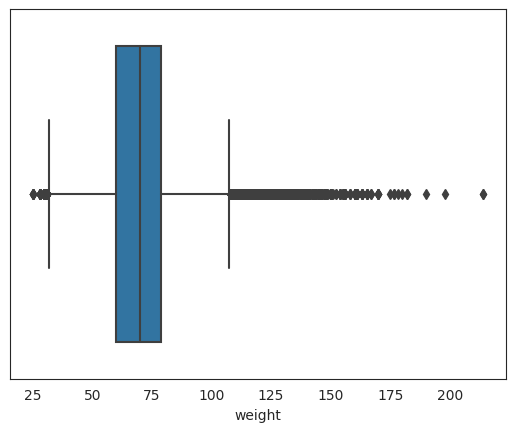

In [12]:
sns.boxplot(x=df['weight'])

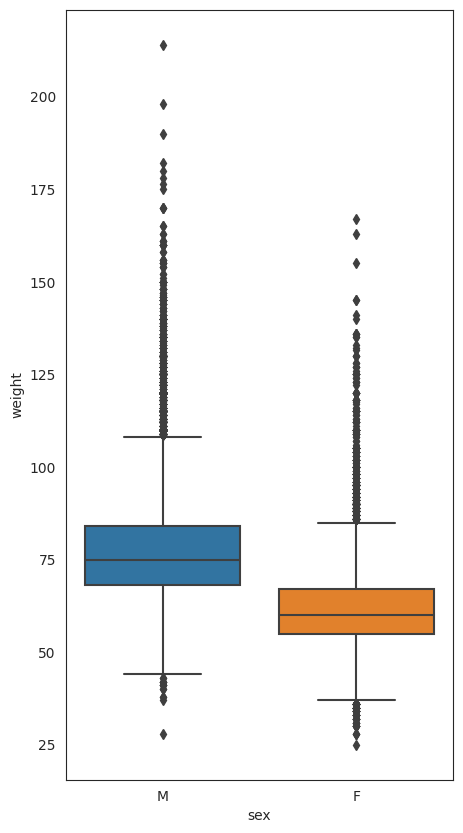

In [13]:
plt.figure(figsize=(5, 10))
sns.boxplot(data=merged, x='sex', y='weight');

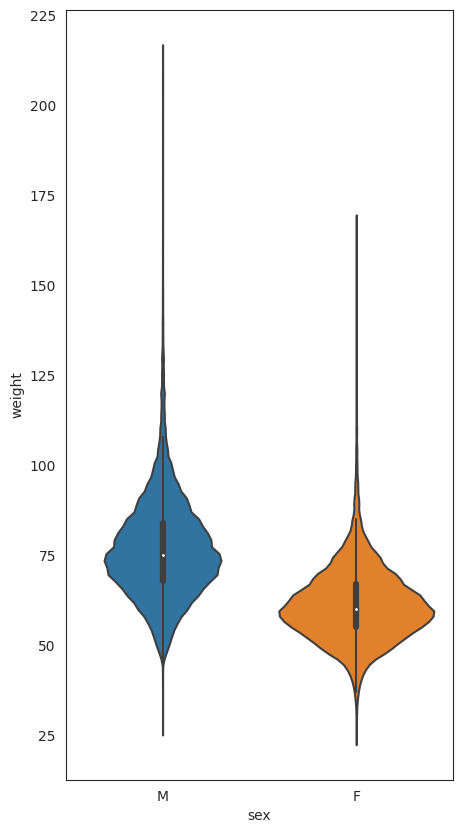

In [14]:
plt.figure(figsize=(5, 10))
sns.violinplot(data=merged, x='sex', y='weight');
# La línea gruesa en medio del violinplot representa el Rango Intercuartílico y el punto blanco la mediana.